c:\Users\Alex\anaconda3\envs\projenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


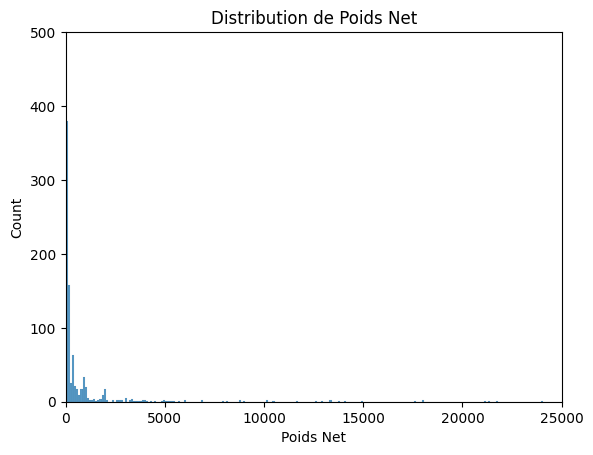

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import configparser
import seaborn as sns
import shap
import sqlite3


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

config = configparser.ConfigParser()
config.read('config.config')
fichier = config['Settings']['fichier']
ligne_debut = int(config['Settings']['ligne_debut'])
seed = int(config['Settings']['SEED'])
### Définir la seed
np.random.seed(seed)
### Charger le fichier
data = pd.read_excel(fichier, skiprows=ligne_debut)
data = data.sample(n=1000, random_state=seed)
### Supprimer les colonnes de quantité et CA
data = data.drop(['Qté facturée (Base Unit)','CA Net'], axis = 1)
### Changer le type de données dans certaines colonnes
data['Poids Net'] = pd.to_numeric(data['Poids Net'], errors='coerce')
data['Donneur d\'ordre'] = data['Donneur d\'ordre'].astype(str)
### Retirer les poids négatifs ou nuls
data = data.loc[data['Poids Net'] >0]
# Vérifier que le minimum de la colonne est supérieur ou égal à zéro
assert (data[['Poids Net']] > 0).all().all(), "Il y a des valeurs négatives dans les données d'origine"
### Retirer les articles finissant par -999 ou -998
data = data[~data['Article'].str.endswith(('-999', '-998'))]
# Vérifier qu'il ne reste pas d'articles finissant par -999 ou -998
assert (~data['Article'].str.endswith(('-999', '-998'))).all(), "Il reste des articles finissant par -999 ou -998"
### Retirer les données pour un donneur d'ordre qui commence par EPREST
data = data[~data['Article'].str.startswith(('EPREST'))]
# Vérifier qu'il ne reste pas d'articles commençant par EPREST
assert (~data['Article'].str.startswith(('EPREST'))).all(), "Il reste des articles commençant par EPREST"
### Transformer les données
data = pd.get_dummies(data, columns=['Donneur d\'ordre','Article','Mois/Année de facturation'])

sns.histplot(data['Poids Net'])
plt.title(f'Distribution de Poids Net')
plt.xlim(0,25000)
plt.ylim(0,500)
plt.show()